In [1]:
#imports
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])


# View result
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [2]:
#Check for missing and duplicates
print(df.duplicated().sum()) # no duplicates
df.isna().sum() #We have alot of missing data that we will deal with in different ways

0


id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [3]:
from utils.helpers import preprocessing
df = preprocessing(df)
df.sample(5)

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,...,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression,total_gdp
75702,75755,Khushi,0,-1.081110,Chennai,0,0.831780,0.621319,NaN,-1.433188,...,NaN,0.450160,1.256670,0.893390,0,0.972420,1.422593,1,0,91.53
135090,135182,Pari,0,1.422024,Visakhapatnam,1,0.026318,NaN,0.712014,NaN,...,0.017998,-0.473183,-1.230543,1.892109,1,-0.065536,0.007808,1,0,21.07
56034,56068,Rohan,1,0.291576,Faridabad,1,-0.618052,NaN,-0.710650,NaN,...,0.017998,0.450160,0.013064,-1.141039,0,1.491398,0.715201,0,0,NaN
37688,37710,Rohan,1,0.533815,Bangalore,1,-2.014187,NaN,1.423346,NaN,...,0.724144,-0.473183,0.013064,0.893390,1,0.712931,1.422593,0,0,NaN
76889,76946,Ayaan,1,-0.919618,Surat,0,0.831780,-1.551725,NaN,-1.323928,...,NaN,0.450160,0.013064,-1.067060,0,-1.622469,0.007808,0,0,42.34


In [4]:
#Now we want to split it into 2 datasets, students and workers
students_df = df.loc[df["working_student"] == 0].drop({"working_student", "work_pressure", "job_satisfaction"}, axis=1)
working_df = df.loc[df["working_student"] == 1].drop({"working_student", "study_satisfaction", "cgpa", "academic_pressure"}, axis=1)

print(f"Students: {round((students_df['depression'] == 1).sum() / (df['depression'] == 1).sum() * 100)}% depressed, Working: {round((working_df['depression'] == 1).sum() / (df['depression'] == 1).sum() * 100)}% depressed")

display(students_df.sample(5))

Students: 64% depressed, Working: 36% depressed


,id,name,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression,total_gdp
3244,3245,Vidhi,0,-1.000364,Surat,0.83178,-0.103029,1.004693,-1.429719,1.373503,1.256670,0.486504,0,-1.103491,0.007808,1,0,42.34
68013,68058,Ishaani,0,-1.000364,Jaipur,0.83178,1.345667,0.294498,0.776041,-0.473183,-1.230543,-0.919101,1,-0.584513,0.007808,0,1,18.13
14781,14787,Aanchal,0,-1.646334,Kalyan,0.83178,-0.827377,0.765685,0.776041,-1.396526,0.013064,-0.179309,0,0.712931,-0.699584,0,0,NaN
28350,28367,Saurav,1,-0.677379,Agra,0.83178,-0.103029,0.014517,-0.694466,1.373503,-1.230543,-0.956091,1,-0.065536,1.422593,0,1,8.76
27557,27573,Vidhi,0,-1.807827,Srinagar,0.83178,1.345667,1.059324,-0.694466,0.450160,0.013064,-0.179309,0,1.491398,1.422593,1,1,NaN


Top feature importances:
                  feature  importance
0                     age    0.338023
1              profession    0.096253
2       suicidal_thoughts    0.082125
3           work_pressure    0.073166
4         workstudy_hours    0.070719
5        financial_stress    0.065393
6        job_satisfaction    0.064937
7               total_gdp    0.059526
8                  degree    0.054563
9          sleep_duration    0.033469
10         dietary_habits    0.029798
11                 gender    0.016181
12  family_mental_illness    0.015847


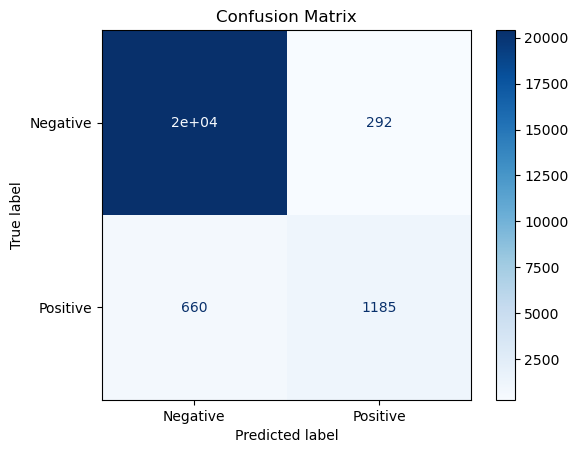

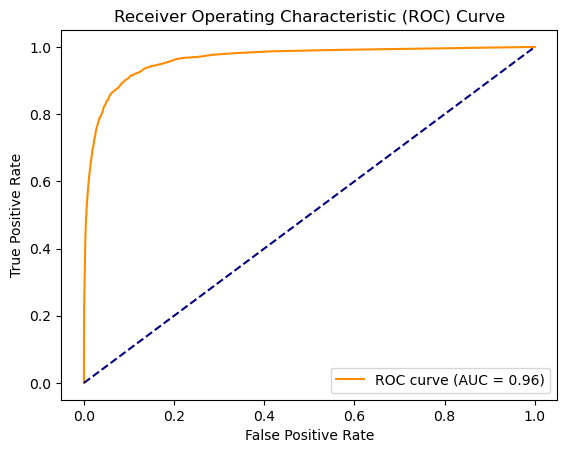

In [5]:
from OurModels import RandomForestRegressorModel
model = RandomForestRegressorModel()
studentModelResults = model.train(working_df)
model.output(*studentModelResults)

In [6]:
# from OurModels import DecisionTreeClassifierModel
# model = DecisionTreeClassifierModel(13)
# studentModelResults = model.train(working_df)
# model.output(*studentModelResults)

In [7]:
df.head()


,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,...,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression,total_gdp
0,0,Aaradhya,0,0.695308,Ludhiana,1,-1.530909,NaN,1.423346,NaN,...,-0.688149,1.373503,1.256670,-0.623184,0,-1.362980,-0.699584,0,0,8.70
1,1,Vivan,1,-1.161856,Varanasi,1,0.885478,NaN,0.712014,NaN,...,0.017998,0.450160,-1.230543,0.486504,1,0.193953,0.007808,0,1,NaN
2,2,Yuvraj,1,-0.596633,Visakhapatnam,0,0.831780,1.345667,NaN,0.895433,...,NaN,-1.396526,1.256670,-1.067060,1,-0.844002,-1.406977,0,1,21.07
3,3,Yuvraj,1,-1.484842,Mumbai,1,0.885478,NaN,1.423346,NaN,...,-1.394295,0.450160,0.013064,-0.808132,1,0.972420,-1.406977,1,1,162.44
4,4,Rhea,0,-0.838871,Kanpur,1,-1.584607,NaN,-1.421982,NaN,...,-1.394295,-1.396526,-1.230543,-0.808132,1,0.712931,0.715201,1,0,8.19
